# Classification With Support Vector Machines

The Support Vector Machine (SVM) is a linear classifier that can be viewed as an extension of the Perceptron developed by Rosenblatt in 1958. The Perceptron guaranteed that you find a hyperplane if it exists. The SVM finds the maximum margin separating hyperplane.

When classes are not linearly separable, the algorithm maximizes the margin but allow some samples within the margin (soft margin). Non-linear kernels can be further used to separate the classes.   


In this notebook, you will be able to draw a dataset and use an SVM to identify the decision boundary. Further, we will demonstate how to apply the SVM to a non linear problem with a non linear kernel. 


In [61]:
#Import Libraries
import drawdata
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as pltcolors
from sklearn import linear_model, svm, discriminant_analysis, metrics
from scipy import optimize
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC
from matplotlib.colors import ListedColormap
from sklearn.inspection import DecisionBoundaryDisplay
from mpl_toolkits import mplot3d

Let's draw a dataset below consisting of 2 labels. Once you are done, click "copy csv" 

In [2]:
from drawdata import draw_scatter

draw_scatter()

Let's now read in the dataset and take a look at it. Each datapoint has 2 features, an x and y coordinate and a label that is either "a" or "b". Let's also adjust the labels to be [-1,1] for the purposes of using some classifiers from scikit- learn. 

In [150]:
data=pd.read_clipboard(sep=",")
data

,x,y,z
0,109.665488,441.340291,a
1,89.123640,432.743145,a
2,65.259981,461.189958,a
3,117.791496,447.269788,a
4,138.769352,401.272852,a
...,...,...,...
363,500.789318,344.802017,b
364,466.203070,396.178124,b
365,493.374859,373.315271,b
366,443.607629,372.066509,b


In [151]:
#Rename the labels to integers

for i in range(0, len(data)):
    # checking if the character at char index is equivalent to 'a'
    if(data.iloc[i,2] == 'a'):
        # append $ to modified string
        data.iloc[i,2] = -1
    else:
        # append original string character
        data.iloc[i,2] = 1
data.iloc[:,2]=data.iloc[:,2].astype('int')

Let's start by creating a training and a test set and fitting a simple linear classifier SVM

In [1]:
#Fit classifier 
C_margin=0.025

In [2]:
#Create our datasets
X=np.array(data.iloc[:,0:2])
y=np.array(data.iloc[:,2])


#Create a 60/40 training and test split 
X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.4, random_state=42)
    
#Fit classifier 
clf=svm.SVC(kernel='linear',C=C_margin)
clf.fit(X_train, y_train)
score = clf.score(X_test, y_test)
print("The classification accuracy is", score)

NameError: name 'data' is not defined

Let's plot the original dataset and the decision boundary prescribed by the SVM

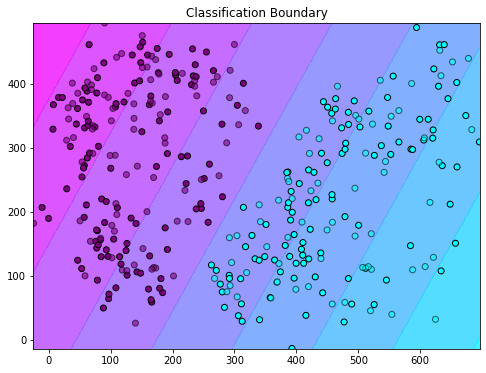

In [153]:
#Plot original dataset that you drew 
cm = plt.cm.get_cmap('cool_r')
cm_bright = ListedColormap(["purple", "cyan"])
figure = plt.figure(figsize=(8, 6))
ax = plt.subplot(1,1,1)
#Plot decision boundary
ax.set_title("Classification Boundary")
DecisionBoundaryDisplay.from_estimator(clf, X, cmap=cm, alpha=0.8, ax=ax, eps=0.5)
# Plot the training points
ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train,cmap=cm_bright , edgecolors="k")
# Plot the testing points
ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6, edgecolors="k")
plt.savefig("C:/Users/rg727/Desktop/decisionboundary.png",dpi=300)

We can also plot the support vectors and the margin. 

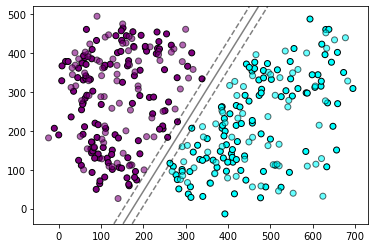

In [133]:
#Helper code by Jake VanderPlas
def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
  


plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train,cmap=cm_bright , edgecolors="k")
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6, edgecolors="k")
plot_svc_decision_function(clf)
plt.savefig("C:/Users/rg727/Desktop/ssupport_vectors.png",dpi=300)

Right now, our margin is C=0.025, which is very soft, and allows for some misclassification of the blue points.So overall, the classifier is doing a good job, but our classes are pretty distinct. What if we use a harder case? Let's create a non-linearly separable case.

In [56]:
from drawdata import draw_scatter

draw_scatter()

Let's try to fit a linear SVM to this bad boy. 

In [141]:
data=pd.read_clipboard(sep=",")

#Rename the labels to integers

for i in range(0, len(data)):
    # checking if the character at char index is equivalent to 'a'
    if(data.iloc[i,2] == 'a'):
        # append $ to modified string
        data.iloc[i,2] = -1
    else:
        # append original string character
        data.iloc[i,2] = 1
data.iloc[:,2]=data.iloc[:,2].astype('int')

#Create our datasets
X=np.array(data.iloc[:,0:2])
y=np.array(data.iloc[:,2])


#Create a 60/40 training and test split 
X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.4, random_state=42)
    
#Fit classifier 
clf=svm.SVC(kernel='linear',C=0.025)
clf.fit(X_train, y_train)
score = clf.score(X_test, y_test)
print("The classification accuracy is", score)

The classification accuracy is 0.5263157894736842


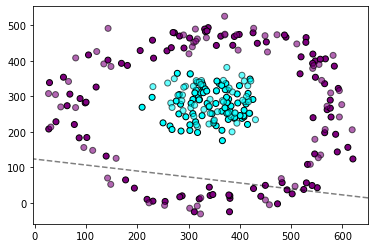

In [142]:
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train,cmap=cm_bright , edgecolors="k")
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6, edgecolors="k")
plot_svc_decision_function(clf)
plt.savefig("C:/Users/rg727/Desktop/nonlinear_example.png",dpi=300)

Ruh roh! Our linear classifier is never going to work for this dataset! We'll have to use the kernel trick- that is, we need to map our data to a higher dimensional space with an additional feature that may be able to better help us separate out the two classes.

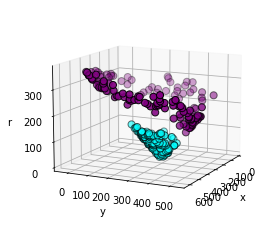

In [145]:
#Create an additional dimension
r = np.sqrt((X[:, 0]-300)**2+(X[:, 1]-300)**2)


def plot_3D(elev=30, azim=30, X=X, y=y):
    ax = plt.subplot(projection='3d')
    ax.scatter3D(X[:, 0], X[:, 1], r, c=y, s=50, cmap=cm_bright,edgecolors="k")
    ax.view_init(elev=elev, azim=azim)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('r')
    

#interact(plot_3D, elev=(-90, 90), azip=(-180, 180),
 #        X=fixed(X), y=fixed(y));


#Create a 3D plot
ax = plt.subplot(projection='3d')
ax.scatter3D(X[:, 0], X[:, 1], r, c=y, s=50, cmap=cm_bright,edgecolors="k")
ax.view_init(elev=12, azim=26)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('r')
plt.savefig("C:/Users/rg727/Desktop/kernel_trick.png",dpi=300)

Let's implement a similiar radial basis function kernel in our SVC rather than using a linear kernel. 

In [146]:
#Create our datasets
X=np.array(data.iloc[:,0:2])
y=np.array(data.iloc[:,2])


#Create a 60/40 training and test split 
X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.4, random_state=42)
    
#Fit classifier 
clf=svm.SVC(kernel='rbf',C=10)
clf.fit(X_train, y_train)
score = clf.score(X_test, y_test)
print("The classification accuracy is", score)


The classification accuracy is 1.0


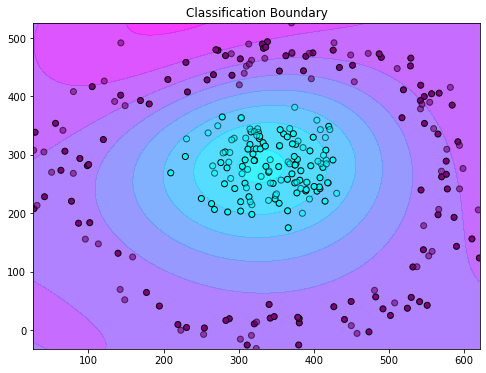

In [147]:
#Plot original dataset that you drew 
cm = plt.cm.get_cmap('cool_r')
cm_bright = ListedColormap(["purple", "cyan"])
figure = plt.figure(figsize=(8, 6))
ax = plt.subplot(1,1,1)
#Plot decision boundary
ax.set_title("Classification Boundary")
DecisionBoundaryDisplay.from_estimator(clf, X, cmap=cm, alpha=0.8, ax=ax, eps=0.5)
# Plot the training points
ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train,cmap=cm_bright , edgecolors="k")
# Plot the testing points
ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6, edgecolors="k")
plt.savefig("C:/Users/rg727/Desktop/rbf_contours.png",dpi=300)

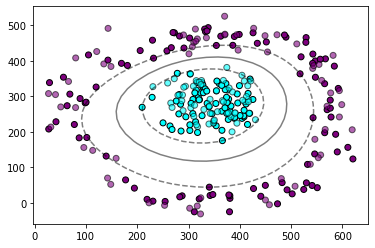

In [149]:
#Plot decision boundary
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train,cmap=cm_bright , edgecolors="k")
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6, edgecolors="k")
plot_svc_decision_function(clf)
plt.savefig("C:/Users/rg727/Desktop/rbf_boundary.png",dpi=300)